<a href="https://colab.research.google.com/github/nadhybrandao/Atividades_Praticas_WoMarkersCode/blob/main/WoMakersCode_Probabilidade_e_Amostragem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estatística - Probabilidade e Amostragem

**Considerando a base de dados de populacao_brasileira.json responda as
questões abaixo (os dados são fictícios).**

Você é uma pesquisadora desenvolvendo uma análise sobre as
características da força de trabalho nos estados brasileiros. Responda as
perguntas abaixo:
1. Considere pessoas fluentes em inglês, qual a probabilidade
complementar? Ou seja, qual a probabilidade de escolhermos uma
pessoa aleatória e ela não ser fluente em inglês. Considere fluente
quem tem o nível avançado.
2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará,
qual é a probabilidade de ela ter uma renda superior a 5 mil reais?
3. Descubra a probabilidade de uma pessoa ter ensino superior completo
no estado do Amazonas. Qual a probabilidade da quinta pessoa que
você conversar, que é amazonense, ter ensino superior completo?
4. Considerando a renda das pessoas do nosso conjunto, podemos dizer
que a renda de uma pessoa brasileira está na sua maioria em que faixa
(faça faixa de 1.500 reais)? Qual é a sua função densidade de
probabilidade?
5. Calcule a média e a variância da renda da amostra. Depois faça a
distribuição normal, inclua o gráfico.
6. Primeiro considere a probabilidade encontrada no nosso conjunto de
pessoas com escolaridade de pós-graduação. Considerando a amostra
de população brasileira com 1 milhão de habitantes, qual a
probabilidade de encontrarmos 243 mil pessoas com pós-graduação?
7. Somando as densidades nós temos a função de densidade acumulada.
Considerando a coluna ‘Escolaridade’ faça a função de densidade
acumulada discreta para cada nível de escolaridade.
8. Qual a margem de erro amostral da proporção populacional
considerando a proporção de pessoas com nível de inglês
intermediário?
9. Calcula a renda da população. Qual a probabilidade de encontrar 60
pessoas com uma renda mil reais superior à média?
10. Qual a probabilidade de escolhermos alguém do Sudeste que seja
homem, com ensino fundamental e com renda maior que 2 mil reais por
mês?


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import binom, geom, norm
import matplotlib.pyplot as plt

# Carregando o arquivo JSON
df = pd.read_csv('./populacao_brasileira.csv')
df.head(10)


,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M
5,5,AM,38,Fundamental,Avançado,4441.57,F
6,6,DF,56,Médio,Intermediário,528.36,F
7,7,DF,36,Superior,Avançado,2203.10,F
8,8,PI,40,Fundamental,Básico,3577.07,F
9,9,AP,28,Superior,Avançado,2796.95,M


# Questão 01

In [ ]:
#Considere pessoas fluentes em inglês, qual a probabilidade complementar?
#Ou seja, qual a probabilidade de escolhermos uma pessoa aleatória e ela não ser fluente em inglês.
#Considere fluente quem tem o nível avançado.

fluente_ingles = len(df[df['nível de proficiência em inglês'] == 'Avançado']) / len(df)
P_nao_fluente = 1 - fluente_ingles
print(f"Probabilidade de não ser fluente em inglês: {P_nao_fluente:.4f}")

Probabilidade de não ser fluente em inglês: 0.6560


# Questão 02

In [ ]:
# uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará, qual é a probabilidade de ela ter uma renda superior a 5 mil reais?

pessoas_alagoas_para = df[df['estado'].isin(['AL', 'PA'])]
P_renda_5k = len(pessoas_alagoas_para[pessoas_alagoas_para['renda'] > 5000]) / len(pessoas_alagoas_para)
print(f"Probabilidade de renda superior a 5 mil reais (Alagoas ou Pará): {P_renda_5k:.4f}")


Probabilidade de renda superior a 5 mil reais (Alagoas ou Pará): 0.0506


# Questão 03

In [ ]:
#Descubra a probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas.
#Qual a probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo?

pessoas_amazonas = df[df['estado'] == 'AM']
P_superior_amazonas = len(pessoas_amazonas[pessoas_amazonas['escolaridade'] == 'Superior']) / len(pessoas_amazonas)

# Probabilidade de a quinta pessoa ter ensino superior completo
P_quinta_pessoa = geom.pmf(5, P_superior_amazonas)
print(f"Probabilidade da quinta pessoa ter ensino superior completo: {P_quinta_pessoa:.4f}")


Probabilidade da quinta pessoa ter ensino superior completo: 0.0803


# Questão 04

In [ ]:
#Considerando a renda das pessoas do nosso conjunto, podemos dizer que a renda de uma pessoa brasileira está na sua maioria em que faixa
#(faça faixa de 1.500 reais)? Qual é a sua função densidade de probabilidade?

df['faixa_renda'] = pd.cut(df['renda'], bins=np.arange(0, df['renda'].max() + 1500, 1500))
faixa_mais_comum = df['faixa_renda'].value_counts().idxmax()
fdp_renda = df['faixa_renda'].value_counts(normalize=True)

print(f"Faixa de renda mais comum: {faixa_mais_comum}")
print(f"Função Densidade de Probabilidade:\n{fdp_renda}")


Faixa de renda mais comum: (3000.0, 4500.0]
Função Densidade de Probabilidade:
faixa_renda
(3000.0, 4500.0]    0.442
(1500.0, 3000.0]    0.414
(4500.0, 6000.0]    0.089
(0.0, 1500.0]       0.055
Name: proportion, dtype: float64


# Questão 05

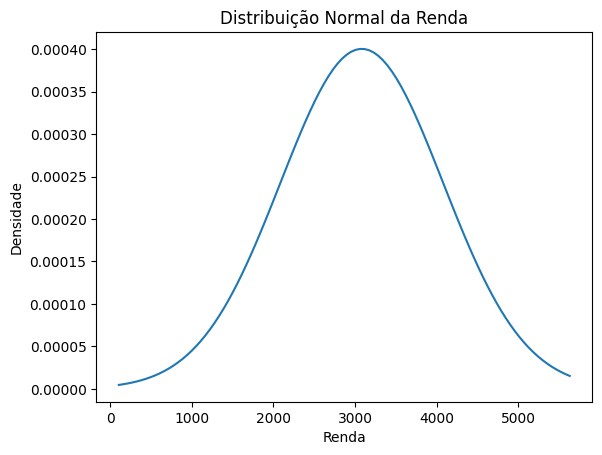

Média da renda: 3082.54
Variância da renda: 993156.23


In [ ]:
#Calcule a média e a variância da renda da amostra. Depois faça a distribuição normal, inclua o gráfico.

media_renda = df['renda'].mean()
variancia_renda = df['renda'].var()

# Valores para a distribuição normal
renda_values = np.linspace(df['renda'].min(), df['renda'].max(), 100)
distribuicao_normal = norm.pdf(renda_values, media_renda, np.sqrt(variancia_renda))

plt.plot(renda_values, distribuicao_normal)
plt.title("Distribuição Normal da Renda")
plt.xlabel("Renda")
plt.ylabel("Densidade")
plt.show()

print(f"Média da renda: {media_renda:.2f}")
print(f"Variância da renda: {variancia_renda:.2f}")


# Questão 06

In [ ]:
#Primeiro considere a probabilidade encontrada no nosso conjunto de pessoas com escolaridade de pós-graduação.
#Considerando a amostra de população brasileira com 1 milhão de habitantes,
#qual a probabilidade de encontrarmos 243 mil pessoas com pós-graduação?

P_pos_grad = len(df[df['escolaridade'] == 'Pós-graduação']) / len(df)
P_243mil = binom.pmf(243000, 1000000, P_pos_grad)

print(f"Probabilidade de encontrar 243 mil pessoas com pós-graduação: {P_243mil:.4f}")

Probabilidade de encontrar 243 mil pessoas com pós-graduação: 0.0000


# Questão 07

In [ ]:
#Somando as densidades nós temos a função de densidade acumulada.
#Considerando a coluna ‘Escolaridade’ faça a função de densidade acumulada discreta para cada nível de escolaridade.

cdf_escolaridade = df['escolaridade'].value_counts(normalize=True).cumsum()
print("Função de Densidade Acumulada para Escolaridade:")
print(cdf_escolaridade)

Função de Densidade Acumulada para Escolaridade:
escolaridade
Fundamental      0.266
Pós-graduação    0.519
Superior         0.762
Médio            1.000
Name: proportion, dtype: float64


# Questão 08

In [ ]:
#Qual a margem de erro amostral da proporção populacional considerando a proporção de pessoas com nível de inglês intermediário?

from math import sqrt

P_intermediario = len(df[df['nível de proficiência em inglês'] == 'Intermediário']) / len(df)
n = len(df)
z_score = 1.96  # Para 95% de confiança
margem_erro = z_score * sqrt((P_intermediario * (1 - P_intermediario)) / n)

print(f"Margem de erro para inglês intermediário: {margem_erro:.4f}")


Margem de erro para inglês intermediário: 0.0291


# Questão 09

In [ ]:
#Calcula a renda da população. Qual a probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média?

P_superior_1000 = len(df[df['renda'] > media_renda + 1000]) / len(df)
P_60_pessoas = binom.pmf(60, len(df), P_superior_1000)

print(f"Probabilidade de encontrar 60 pessoas com renda 1000 reais acima da média: {P_60_pessoas:.4f}")

Probabilidade de encontrar 60 pessoas com renda 1000 reais acima da média: 0.0000


# Questão 10

In [ ]:
#Qual a probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês?

pessoas_sudeste_homem = df[(df['estado'].isin(['MG','SP','RJ'])) & (df['sexo'] == 'M') &
                           (df['escolaridade'] == 'Fundamental') & (df['renda'] > 2000)] # Use .isin() method to check if the value in 'estado' column is present in the list
P_sudeste_homem_2k = len(pessoas_sudeste_homem) / len(df)

print(f"Probabilidade de alguém do Sudeste, homem, com ensino fundamental e renda > 2 mil: {P_sudeste_homem_2k:.4f}")


Probabilidade de alguém do Sudeste, homem, com ensino fundamental e renda > 2 mil: 0.0120
